In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yangcao/Projects/00_self_learning/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
df = pd.read_csv("../data/train.csv", header=0)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


/Users/yangcao/Projects/00_self_learning/env/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


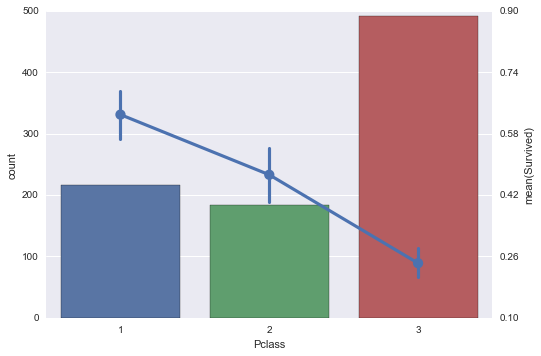

In [7]:
fig, ax1 = plt.subplots()
sns.countplot(x='Pclass', data=df, ax=ax1)
ax2 = plt.twinx(ax1)
sns.pointplot(x='Pclass', y='Survived', data=df, ax=ax2)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax2.grid(None)

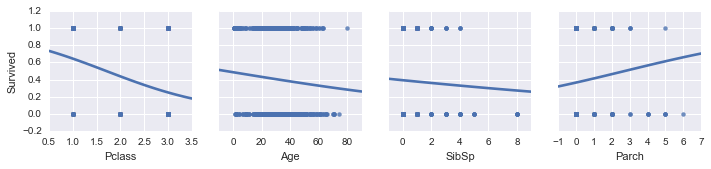

In [9]:
sns.pairplot(df, x_vars=['Pclass', 'Age', 'SibSp', 'Parch' ], y_vars=['Survived'], kind='reg', plot_kws=dict(logistic=True, ci=None))

In [47]:
df['c_Fare'], bins = pd.qcut(df['Fare'],10,retbins=True)

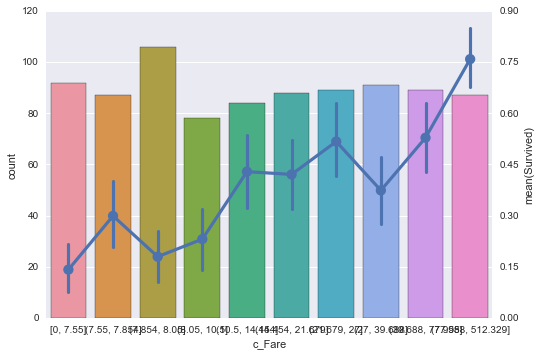

In [48]:
fig, ax1 = plt.subplots()
sns.countplot(x='c_Fare', data=df, ax=ax1)
ax2 = plt.twinx(ax1)
sns.pointplot(x='c_Fare', y='Survived', data=df, ax=ax2)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax2.grid(None)

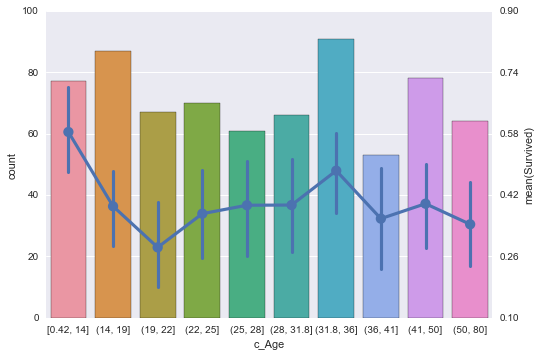

In [55]:
df['c_Age'], bins = pd.qcut(df['Age'],10,retbins=True)
fig, ax1 = plt.subplots()
sns.countplot(x='c_Age', data=df, ax=ax1)
ax2 = plt.twinx(ax1)
sns.pointplot(x='c_Age', y='Survived', data=df, ax=ax2)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax2.grid(None)

In [56]:
df.groupby('c_Age').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
c_Age,,,,,,,
"[0.42, 14]",427.766234,0.584416,2.623377,5.703506,1.831169,1.337662,31.928464
"(14, 19]",445.068966,0.390805,2.448276,17.534483,0.482759,0.367816,31.676390
"(19, 22]",400.955224,0.283582,2.671642,21.171642,0.223881,0.179104,23.624128
"(22, 25]",481.614286,0.371429,2.285714,24.114286,0.442857,0.371429,34.826190
"(25, 28]",443.409836,0.393443,2.393443,27.114754,0.295082,0.163934,23.206075
"(28, 31.8]",453.530303,0.393939,2.287879,29.924242,0.318182,0.212121,28.009721
"(31.8, 36]",462.846154,0.483516,2.131868,34.093407,0.340659,0.219780,44.517718
"(36, 41]",429.641509,0.358491,2.056604,39.047170,0.396226,0.849057,40.532308
"(41, 50]",484.269231,0.397436,1.846154,45.833333,0.384615,0.346154,42.085260


In [ ]:
df.fillna()